In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

In [3]:
# Load the dataset into python environment
df = pd.read_csv('/content/train_exit.csv')

In [4]:
#Get the first 4 rows of the dataset
df.head(4)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1


EDA

In [5]:
##  size of the dataframe
df.shape

(13994, 30)

In [6]:
#display columns in dataset
df.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [7]:
# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [8]:
#descriptive statistical summary
df.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [10]:
#describe catagorical ariables
df.describe(include='object')

,player_id,name,gender,country,height,weight,strong_foot,dedication_level,coaching
count,13994,13994,13975,13994,13994,13577,13442,13994,13869
unique,13994,13994,2,163,31,88,4,3,4
top,PLID_4964,Keva Horan,M,England,6'0,165lbs,Right,Medium,Academy
freq,1,1,6992,1157,2251,1106,8359,9704,9390


In [13]:
#checking the null values
df.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [14]:
#checking the duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13989    False
13990    False
13991    False
13992    False
13993    False
Length: 13994, dtype: bool

In [16]:
# 'duplicates' now contains all the duplicate rows
duplicates = df[df.duplicated(keep=False)]


In [18]:
#counts in selection
df['selection'].value_counts()

1    7802
0    6192
Name: selection, dtype: int64

Data visualization


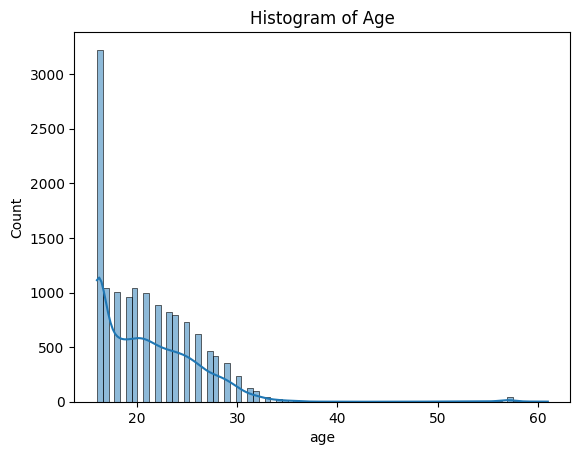

In [17]:
#Univarate Analysis

sns.histplot(df['age'], kde=True,edgecolor='k')
plt.title('Histogram of Age')
plt.show()

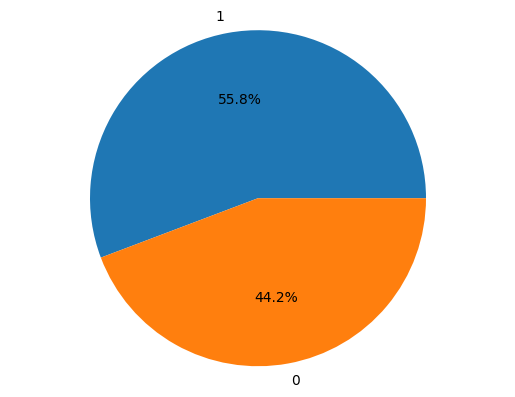

In [19]:

# selected or not in pie chart
plt.pie(df['selection'].value_counts(), labels=['1', '0'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [20]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 21 numerical columns : ['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']

We have 9 categorical columns : ['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


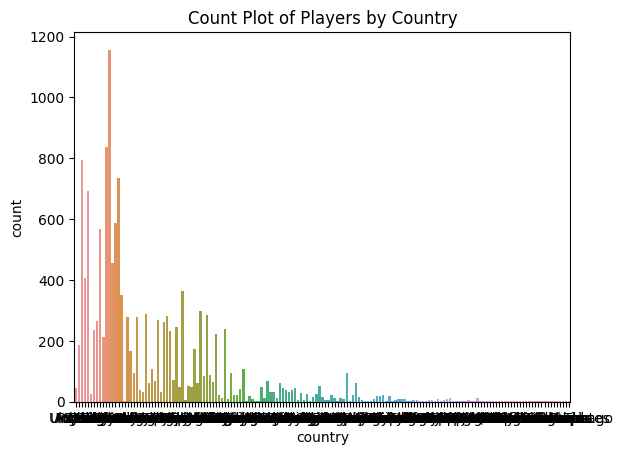

In [21]:
#Count Plot of Players by Country
sns.countplot(x='country', data=df)
plt.title('Count Plot of Players by Country')
plt.show()


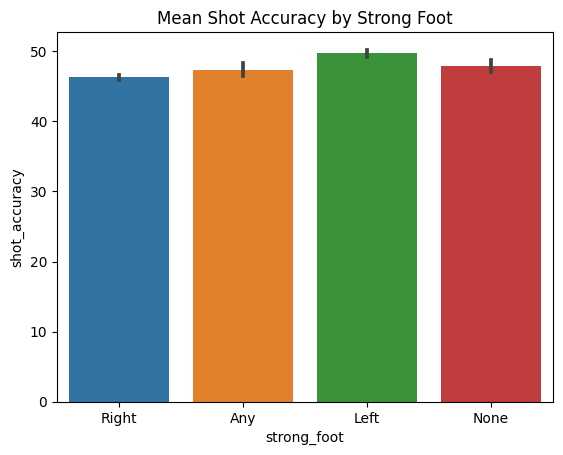

In [24]:
sns.barplot(x='strong_foot', y='shot_accuracy', data=df)
plt.title('Mean Shot Accuracy by Strong Foot')
plt.show()


Bivariate analysis

<Axes: xlabel='age', ylabel='count'>

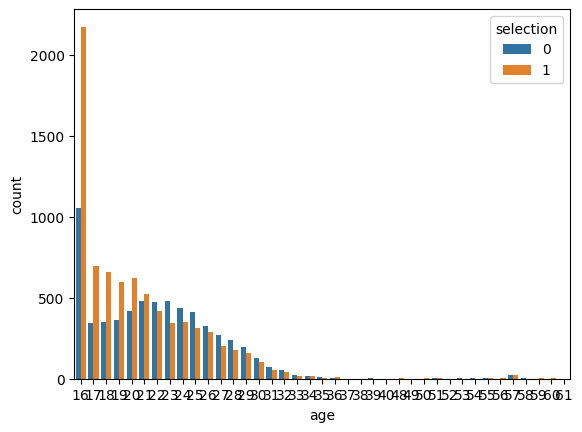

In [28]:
sns.countplot(x='age',hue='selection',data=df)

<Figure size 1000x600 with 0 Axes>

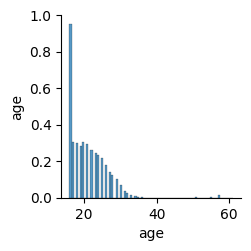

In [31]:
# Pair plot
plt.figure(figsize=(10, 6))
sns.pairplot(df[['height', 'weight', 'age']])
plt.show()


<Axes: xlabel='age', ylabel='count'>

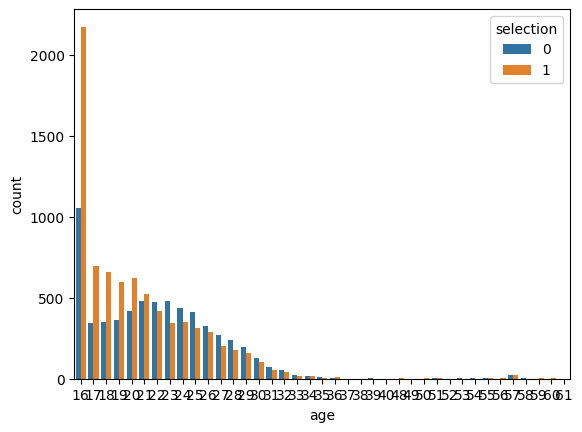

In [36]:
sns.countplot(x='age',hue='selection',data=df)

<Axes: xlabel='country', ylabel='count'>

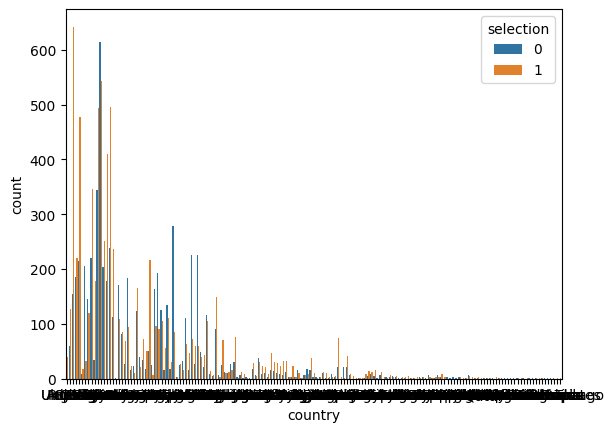

In [37]:
sns.countplot(x='country',hue='selection',data=df)

Multivariate analysis

<ipython-input-40-96a2af6bcaf5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


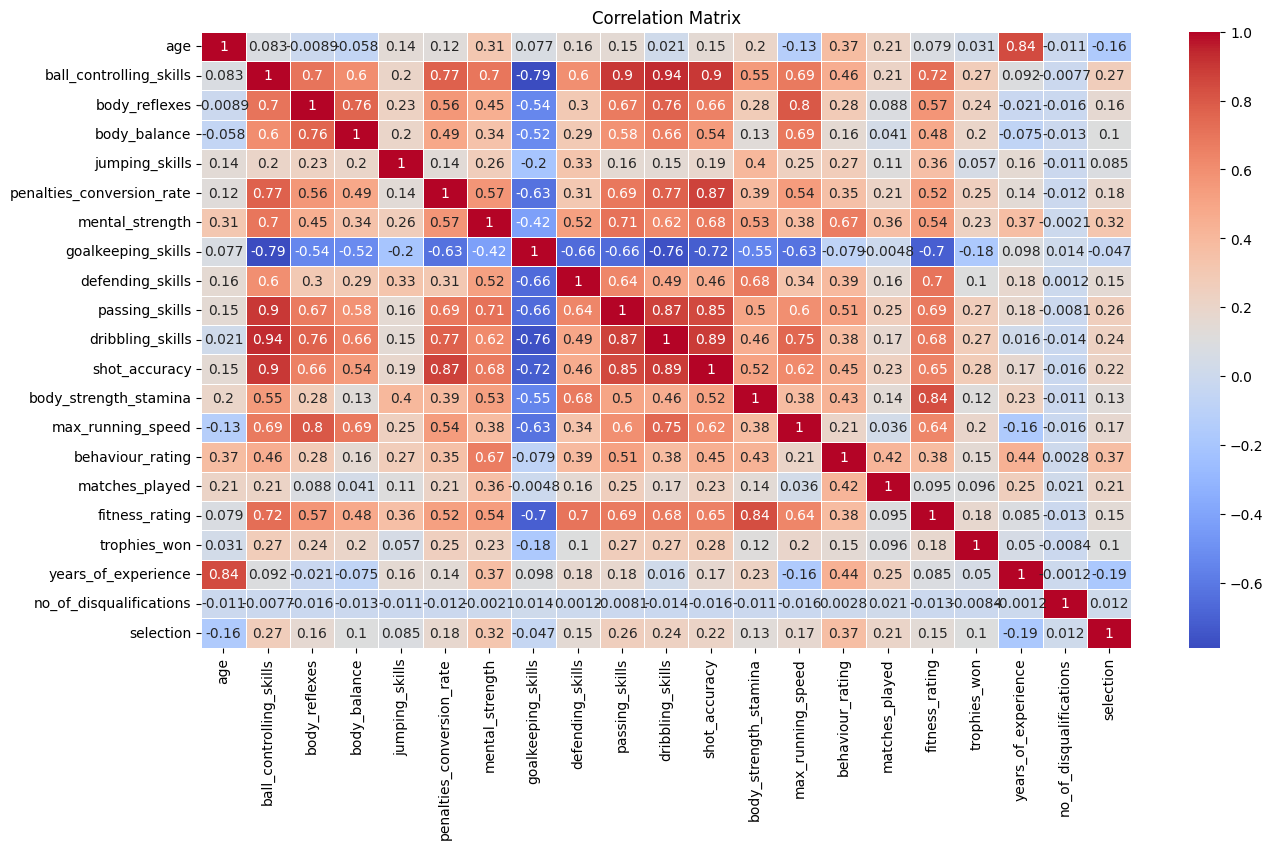

In [40]:
# Heatmap for correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-43-7663971910ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['height', 'weight', 'age', 'ball_controlling_skills']].corr()


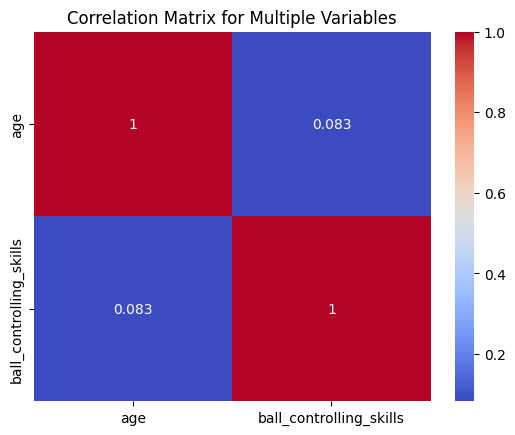

In [43]:
correlation_matrix = df[['height', 'weight', 'age', 'ball_controlling_skills']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Multiple Variables')
plt.show()


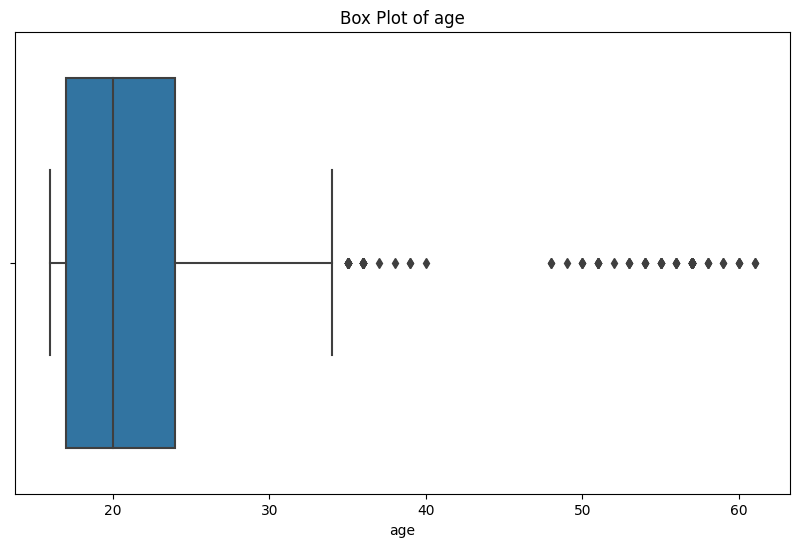

In [45]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of age')
plt.show()

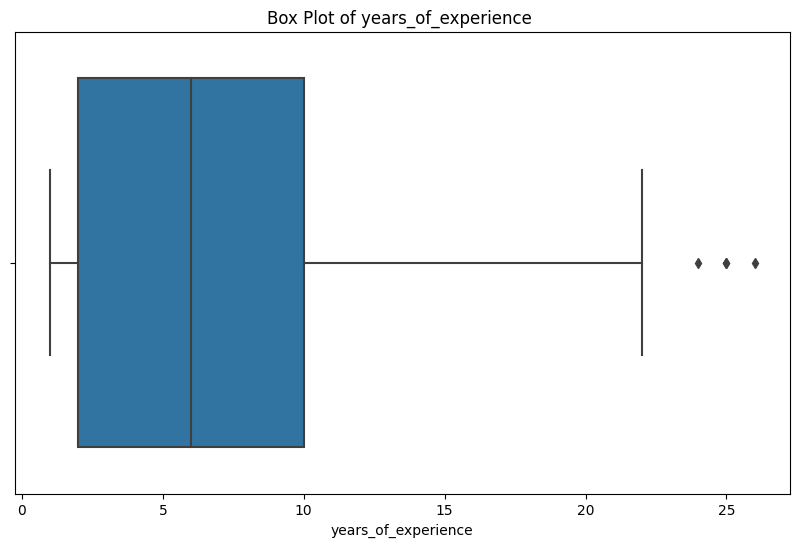

In [47]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['years_of_experience'])
plt.title('Box Plot of years_of_experience ')
plt.show()

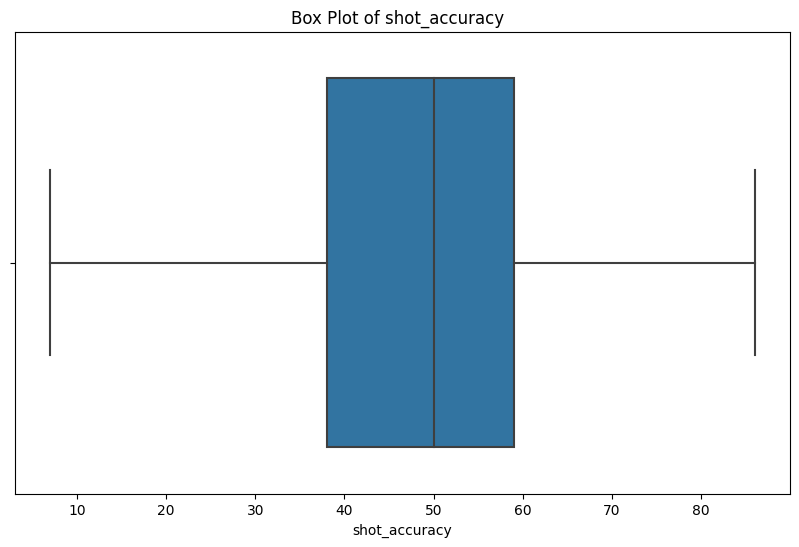

In [49]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['shot_accuracy'])
plt.title('Box Plot of shot_accuracy  ')
plt.show()

In [51]:
df.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

there isa strong correlation

**preprocessing**


In [44]:
#take the copy of dataset into data
data=df.copy()
data


,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [56]:
# checkany inconsistent data
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}: {df[col].unique()}")



Unique values in player_id: ['PLID_4964' 'PLID_11234' 'PLID_19127' ... 'PLID_5193' 'PLID_12173'
 'PLID_236']
Unique values in name: ['Keva Horan' 'Herma Tann' 'Eilene Kizer' ... 'Marylouise Mosley'
 'Teri Escamilla' 'Darius Schuman']
Unique values in gender: ['M' 'F' nan]
Unique values in country: ['Ukraine' 'Russia' 'Spain' 'Chile' 'Argentina' 'Guinea' 'China PR'
 'United States' 'Italy' 'Belgium' 'Germany' 'England' 'Colombia' 'Brazil'
 'France' 'Netherlands' 'Afghanistan' 'Sweden' 'Switzerland' 'Ghana'
 'Poland' 'Iceland' 'Bulgaria' 'Mexico' 'Northern Ireland' 'Uruguay'
 'Ivory Coast' 'Portugal' 'New Zealand' 'Norway' 'Korea Republic'
 'Scotland' 'Greece' 'Denmark' 'Slovakia' 'Japan' 'Togo' 'Slovenia'
 'Finland' 'Australia' 'Paraguay' 'Republic of Ireland' 'Croatia'
 'Saudi Arabia' 'Wales' 'Czech Republic' 'Austria' 'Georgia' 'Gabon'
 'Turkey' 'Madagascar' 'Serbia' 'Congo' 'Tunisia' 'Canada' 'Senegal'
 'Thailand' 'Kosovo' 'Israel' 'Montserrat' 'Guatemala' 'Algeria' 'Iraq'
 'South Af

handling missing values


In [57]:
missing_cols = data.columns[data.isnull().any()]
data[missing_cols].isnull().sum()

gender                        19
weight                       417
ball_controlling_skills      413
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
shot_accuracy                572
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
coaching                     125
years_of_experience          144
dtype: int64

In [70]:
numerical_columns = ['age', 'ball_controlling_skills','body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'years_of_experience']

data[numerical_columns] = data[numerical_columns].fillna(df[numerical_columns].mean())


In [71]:
categorical_columns = ['gender', 'strong_foot', 'coaching']

data[categorical_columns] = data[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [73]:
text_columns = ['player_id', 'name', 'country', 'height', 'weight','dedication_level']

data[text_columns] = data[text_columns].fillna('Unknown')


In [74]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

handling outliers

In [78]:
# View total rows before filtering outliers
print(f'The number of rows before filtering outliers is {data.shape[0]}')

# Handle outliers using z-score
filtered_entries = np.array([True] * len(data))
skewed_cols = ['age', 'years_of_experience']
for col in skewed_cols:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# Filter the DataFrame
data = data[filtered_entries]

# View total rows after filtering
print(f'The number of rows after filtering outliers is {data.shape[0]}')


The number of rows before filtering outliers is 13994
The number of rows after filtering outliers is 13861


feature eng

In [80]:
# View dimension size of data before encoding
print(f'Data dimensions before encoding are {data.shape[0]} rows and {data.shape[1]} columns')

Data dimensions before encoding are 13861 rows and 30 columns


In [82]:
from sklearn.preprocessing import LabelEncoder

# categorical columns
categorical_columns = ['gender', 'strong_foot', 'dedication_level']

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# View dimension size of data after encoding
print(f'Data dimensions after encoding are {data.shape[0]} rows and {data.shape[1]} columns')


Data dimensions after encoding are 13861 rows and 30 columns


<ipython-input-82-8871abcfb8d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-82-8871abcfb8d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-82-8871abcfb8d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

split test and train set

In [83]:
X = data.drop('selection', axis=1)
y = data['selection']

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [88]:
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_cols)

# Remove non-numeric columns for scaling
numeric_data = data.drop(non_numeric_cols, axis=1)

# Scale the numeric data
scaled_data = scaler.fit_transform(numeric_data)


Non-numeric columns: ['player_id', 'name', 'country', 'height', 'weight', 'coaching']


In [94]:
# Assuming cat_cols is a list of categorical column names
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols)


In [95]:
numeric_cols = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log = LogisticRegression()
log.fit(X_train_numeric, y_train)
prediction = log.predict(X_test_numeric)
accuracy = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the Logistic Regression is', accuracy)


The accuracy of the Logistic Regression is 0.7692030292102416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# Assuming cat_cols is a list of categorical column names
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols)


In [111]:
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols)



In [112]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, axis=1, fill_value=0)


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

In [114]:
tree_predictions = tree_classifier.predict(X_test_encoded)


In [115]:
accuracy = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the Logistic Regression is', accuracy)

The accuracy of the Logistic Regression is 0.7692030292102416


In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols)

# Ensure consistency in columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, axis=1, fill_value=0)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
rf_predictions = rf_classifier.predict(X_test_encoded)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(rf_predictions, y_test)
print('The accuracy of the Random Forest Classifier is', accuracy)


The accuracy of the Random Forest Classifier is 0.8150018031013343


randomforest is best

hyperparameter tuning

In [ ]:
# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Grid Search Cross-Validation object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
rf_predictions = grid_search.predict(X_test_encoded)

# Evaluate the accuracy of the best model
accuracy = metrics.accuracy_score(rf_predictions, y_test)
print('The accuracy of the Random Forest Classifier (with tuned hyperparameters) is', accuracy)

